# Squarify plot for complete efood clientele

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

In [3]:
# Load the RFM_Segment saved from "efood_PartII"
df=pd.read_csv('RFM_Segment.csv')
df = df.reset_index(drop=True)
df = df.drop("Unnamed: 0", axis = 1 )
df.head()

,user_id,frequency,avg_order_value,Recency,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,44118921,1,33.300000,26,1,1,4,114
1,108938802,9,14.733333,4,3,3,4,334
2,110361993,121,12.454545,7,3,4,4,344
3,138437670,1,5.500000,3,3,1,1,311
4,144777339,196,4.342857,0,4,4,1,441


# Calculate RFM Score

In [4]:
# count num of unique segments
df_count_unique = df.groupby('RFMClass')['RFMClass'].nunique()
print(df_count_unique.sum())
# Calculate RFM Score
df['RFM_Score'] = df[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)
print(df['RFM_Score'].head())

64
0     6
1    10
2    11
3     5
4     9
Name: RFM_Score, dtype: int64


In [5]:
# Define df_level function
#def df_level(df):
 #   if df['RFM_Score'] >= 10:
  #      return 'Best Customers'
   # elif((df['F_Quartile'] >= 3) & (df['R_Quartile'] >= 2)):
    #    return 'Loyal Customers'
   # elif ((df['R_Quartile'] <= 2 )):
    #    return ' Customers at the verge of Churning'
   # elif ((df['R_Quartile'] <= 2) & (df['F_Quartile'] >= 1) & (df['M_Quartile'] <= 3)):
    #    return ' Refined Customers at the verge of Churning'
   # else:
    #    return ' Lost Customers'
# Create a new varieable df_level
#df['RFM_level'] = df.apply(df_level, axis = 1)
# print the top 15 rows
#df.head(10)

In [6]:
def df_level(df):
    if df['RFM_Score'] >= 9:
        return 'Best Customers'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal Customers'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Lost Customers'
# create new variable df_level
df['RFM_level'] = df.apply(df_level, axis = 1)
# print the top 15 rows
df.head(10)

,user_id,frequency,avg_order_value,Recency,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,RFM_level
0,44118921,1,33.300000,26,1,1,4,114,6,Potential
1,108938802,9,14.733333,4,3,3,4,334,10,Best Customers
2,110361993,121,12.454545,7,3,4,4,344,11,Best Customers
3,138437670,1,5.500000,3,3,1,1,311,5,Promising
4,144777339,196,4.342857,0,4,4,1,441,9,Best Customers
5,145424244,144,13.562500,1,4,4,4,444,12,Best Customers
6,153963390,9,12.166667,3,3,3,3,333,9,Best Customers
7,155515962,1,5.500000,23,1,1,1,111,3,Lost Customers
8,165219537,1,4.300000,0,4,1,1,411,6,Potential
9,167289633,4,8.500000,4,3,2,2,322,7,Loyal Customers


In [7]:
# Calculate the average values of each RFM_level and return a size for each segment
df_level_agg = df.groupby('RFM_level').agg({
    'Recency' : 'mean',
    'frequency': 'mean',
    'avg_order_value': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(df_level_agg)

                   Recency frequency avg_order_value       
                      mean      mean            mean  count
RFM_level                                                  
Best Customers         2.4     116.6            10.6  44492
Champions              6.5      26.1            10.2  17109
Lost Customers        24.2       1.0             4.5   5270
Loyal Customers       10.5      11.0            10.9  16975
Potential             16.5       4.4            11.9  18834
Promising             17.7       2.8             7.5  11461
Requires Attention    19.6       1.5             5.8   7802


# Plot the Squarify plot

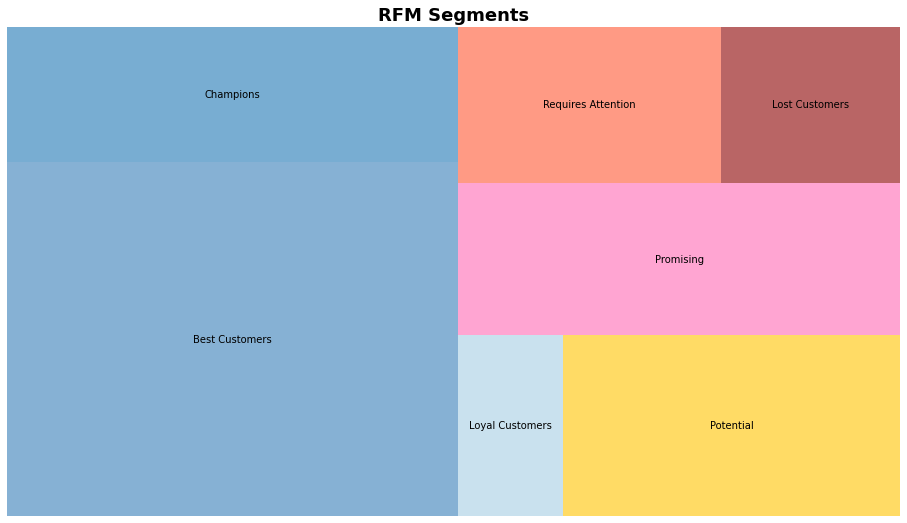

In [16]:
df_level_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
# Define the colour palette
colors = ['#377EB8', '#1F78B4', '#A6CEE3', '#FFC300', '#FF69B4', '#FF5733', '#8B0000']
# Create the plot and resize it 
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=df_level_agg['Count'],
              label=['Best Customers',
                     'Champions',
                     'Loyal Customers',
                     'Potential',
                     'Promising',
                     'Requires Attention',
                     'Lost Customers'],alpha=.6, color=colors,)
plt.title("RFM Segments", fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Squarify plot for efood clientele that ordered breakfast

In [17]:
df2 = pd.read_csv('RFM_Breakfast.csv')
df2.drop("Unnamed: 0", axis = 1 )

,user_id,frequency,avg_order_value,Recency,R_Quartile,F_Quartile,M_Quartile,RFMClass,cuisine
0,44118921,1,33.300000,26,1,1,4,114,Meat
1,108938802,9,14.733333,4,3,3,4,334,Meat
2,108938802,9,14.733333,4,3,3,4,334,Meat
3,108938802,9,14.733333,4,3,3,4,334,Meat
4,110361993,121,12.454545,7,3,4,4,344,Breakfast
...,...,...,...,...,...,...,...,...,...
534265,685557444369,1,6.800000,0,4,1,2,412,Meat
534266,685561325799,1,8.700000,0,4,1,3,413,Meat
534267,685561843323,1,7.200000,0,4,1,2,412,Meat
534268,685566242277,1,11.500000,0,4,1,3,413,Breakfast


In [18]:
# Filter the dataset for breakfast cuisine
RFM_Breakfast = df2[df2['cuisine'] == 'Breakfast'].copy()

# Reset the index of the new dataset
RFM_Breakfast.reset_index(drop=True, inplace=True)
RFM_Breakfast = RFM_Breakfast.drop(columns=['Unnamed: 0'])
RFM_Breakfast.head()

,user_id,frequency,avg_order_value,Recency,R_Quartile,F_Quartile,M_Quartile,RFMClass,cuisine
0,110361993,121,12.454545,7,3,4,4,344,Breakfast
1,144777339,196,4.342857,0,4,4,1,441,Breakfast
2,144777339,196,4.342857,0,4,4,1,441,Breakfast
3,144777339,196,4.342857,0,4,4,1,441,Breakfast
4,144777339,196,4.342857,0,4,4,1,441,Breakfast


# Calculate RFM Score

In [19]:
# count num of unique segments
RFM_Breakfast_count_unique = RFM_Breakfast.groupby('RFMClass')['RFMClass'].nunique()
print(RFM_Breakfast_count_unique.sum())
# Calculate RFM Score
RFM_Breakfast['RFM_Score'] = RFM_Breakfast[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)
print(RFM_Breakfast['RFM_Score'].head())

64
0    11
1     9
2     9
3     9
4     9
Name: RFM_Score, dtype: int64


In [20]:
def RFM_Breakfast_level(RFM_Breakfast):
    if  RFM_Breakfast['RFM_Score'] >= 9:
        return 'Best Customers'
    elif  ((RFM_Breakfast['RFM_Score'] >= 8) and (RFM_Breakfast['RFM_Score'] < 9)):
        return 'Champions'
    elif ((RFM_Breakfast['RFM_Score'] >= 7) and (RFM_Breakfast['RFM_Score'] < 8)):
        return 'Loyal Customers'
    elif ((RFM_Breakfast['RFM_Score'] >= 6) and (RFM_Breakfast['RFM_Score'] < 7)):
        return 'Potential'
    elif ((RFM_Breakfast['RFM_Score'] >= 5) and (RFM_Breakfast['RFM_Score'] < 6)):
        return 'Promising'
    elif ((RFM_Breakfast['RFM_Score'] >= 4) and (RFM_Breakfast['RFM_Score'] < 5)):
        return 'Requires Attention'
    else :
        return 'Lost Customers'
RFM_Breakfast['RFM_Breakfast_level'] = RFM_Breakfast.apply(RFM_Breakfast_level, axis=1)
print(RFM_Breakfast.head(10))

     user_id  frequency  avg_order_value  Recency  R_Quartile  F_Quartile  \
0  110361993        121        12.454545        7           3           4   
1  144777339        196         4.342857        0           4           4   
2  144777339        196         4.342857        0           4           4   
3  144777339        196         4.342857        0           4           4   
4  144777339        196         4.342857        0           4           4   
5  144777339        196         4.342857        0           4           4   
6  144777339        196         4.342857        0           4           4   
7  144777339        196         4.342857        0           4           4   
8  144777339        196         4.342857        0           4           4   
9  144777339        196         4.342857        0           4           4   

   M_Quartile  RFMClass    cuisine  RFM_Score RFM_Breakfast_level  
0           4       344  Breakfast         11      Best Customers  
1           1   

In [21]:
# Calculate the average values of each RFM_level and return a size for each segment
RFM_Breakfast_level_agg = RFM_Breakfast.groupby('RFM_Breakfast_level').agg({
    'Recency' : 'mean',
    'frequency': 'mean',
    'avg_order_value': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_Breakfast_level_agg)

                    Recency frequency avg_order_value        
                       mean      mean            mean   count
RFM_Breakfast_level                                          
Best Customers          1.2     523.4             6.9  143452
Champions               5.5     130.4             6.0   25483
Lost Customers         24.7       1.0             4.0    2963
Loyal Customers        10.0      60.0             6.1   15446
Potential              14.1      22.0             5.9   10256
Promising              17.8       7.5             5.3    6440
Requires Attention     19.9       2.3             4.8    3923


Squarify for Breakfast customers

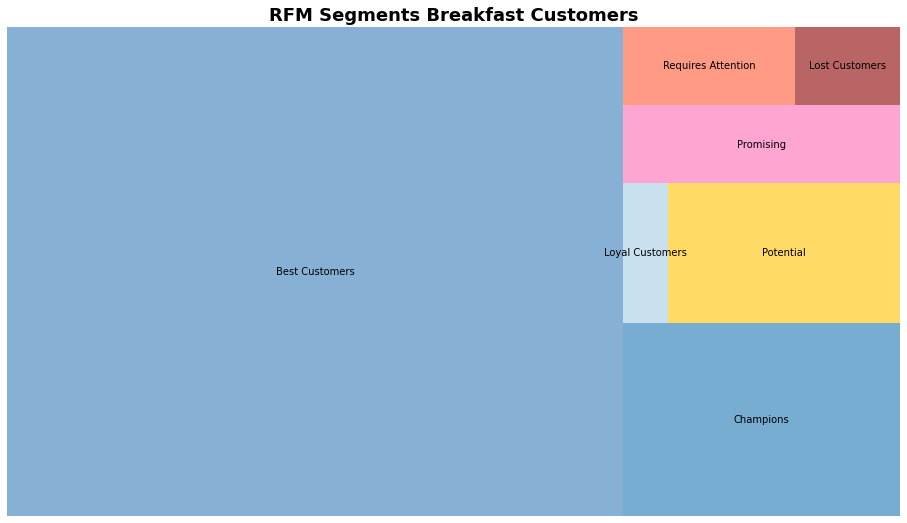

In [24]:
RFM_Breakfast_level_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
# Define the colour palette
colors = ['#377EB8', '#1F78B4', '#A6CEE3', '#FFC300', '#FF69B4', '#FF5733', '#8B0000']
# Create the plot and resize it 
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_Breakfast_level_agg['Count'],
              label=['Best Customers',
                     'Champions',
                     'Loyal Customers',
                     'Potential',
                     'Promising',
                     'Requires Attention',
                     'Lost Customers'],alpha=.6, color=colors,)
plt.title("RFM Segments Breakfast Customers", fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()